In [58]:
import itchat
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import os
import TencentYoutuyun

In [11]:
itchat.auto_login(hotReload = True)
friends = itchat.get_friends(update = True)

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as Bbbaga


In [29]:
def analyseSex(friends):
    #解决中文显示问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    sexs = list(map(lambda x:x['Sex'],friends[1:]))
    print(len(sexs))
    counts = list(map(lambda x:x[1],Counter(sexs).items()))
    print(counts)#这个地方会将人数进行从小到大进行排序，所以label可能有时候需要进行修改
    labels = ['Female','Male','Unknow']
    colors = ['red','yellowgreen','lightskyblue']
    plt.figure(figsize=(8,5),dpi = 80)
    plt.axes(aspect=1)
    plt.pie(counts,labels = labels,colors=colors,labeldistance = 1.1,autopct = '%3.1f%%',
           shadow = False,startangle = 90,pctdistance = 0.6)
    plt.legend(loc='upper right')
    plt.title('%s的微信好友性别组成'%friends[0]['NickName'])
    plt.show()

350
[124, 201, 25]


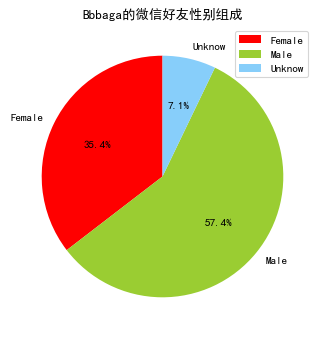

In [30]:
analyseSex(friends)

In [21]:
count=0
for fr in friends:
    if fr['Sex']==2:
        print(fr['Sex'])
        print(fr['NickName'])
        count=count+1

2
CoCo賴
2
单纯蓉儿13929208736
2
永芳
2
香菜
2
紫妍星
2
洛兮
2
吴琼
2
四喜丸子🐾
2
张梦婷
2
不是李玉红
2
未闻
2
嘟嘟鞋贸
2
charisma
2
书🐟
2
Sakura
2
叶云彬
2
阿占
2
鲜花客服3
2
LQM梅
2
琦
2
陈菲
2
曾红英
2
红苹果
2
雅艷
2
倩倩
2
白江蕾
2
里拉
2
@啊锦冰噢
2
Rosalind
2
🐯❇Y
2
淋浴羊
2
vhfy
2
冯雨缘🐳
2
亦木🌿
2
赖冠璇
2
Cathy
2
Elaine裕玲
2
小丫
2
梅
2
福建品牌衣服
2
比比
2
Mr.王
2
柒零
2
JOJO -九九呗
2
慕伽
2
Steamed  bun
2
🍥 🍥 🍥
2
思瑶 | CAMP AWESOME
2
yannlan
2
姚煜洋
2
GRIEZMANN
2
A🐳Pigpig
2
Vain_
2
塔
2
yeah
2
🌿
2
闫语
2
🌱
2
岸芷汀兰
2
yao
2
Yee
2
❤一凤√
2
Priscilla**
2
mercy
2
梧漠
2
🍒刘雯静
2
婷婷仔🎈
2
😄😊😚😳😨😒😒😒
2
時光走了很遠
2
Gengeng
2
幸福的兰宝宝
2
颜欢
2
叶子🍃
2
S Harmon Institute Of Tech.
2
Panda
2
盛夏之晔
2
nothing💦
2
荞麦
2
毛燕
2
Coral
2
MoodyAquairus
2
Winnie🌞
2
我是具卷卷❤
2
ö
2
经年。🍀
2
Athena🦄
2
源泉
2
一只甜腻的呆瓜
2
臾欢
2
ᴛᴡᴇʟᴠᴇ
2
子
2
TATA💕
2
vv22.
2
Yy
2
eve
2
福建鞋批发总部
2
圈哥的树
2
Mars🌟
2
Pisces💧
2
夏不语觞
2
Gin
2
詩敏、
2
千湖孑
2
Pollyanna
2
蔺蔺
2
Lily🌟
2
梅
2
Katrilina🌝
2
ELLIE
2
ʚ🐑ɞ
2
 🎈
2
🌻
2
ᴡᴡ
2
k
2
几丶
2
晴啊晴啊晴
2
康康🌟
2
Yan
2
ICE🐿
2
(ノ=Д=)ノ
2
82【淘利go自助查询优惠卷】
2
A26-实惠购
2
Silvia🌿
2
LU


In [34]:
help('TencentYoutuyun')

Help on package TencentYoutuyun:

NAME
    TencentYoutuyun - # -*- coding: utf-8 -*-

PACKAGE CONTENTS
    auth
    conf
    youtu

FILE
    h:\anaconda\lib\site-packages\tencentyoutuyun\__init__.py




In [62]:
def analyseHeadImage(friends):
    basePath = os.path.abspath('.')
    baseFolder = basePath + '\\HeadImages\\'
    if (os.path.exists(baseFolder)==False):
        os.makedirs(baseFolder)
#     faceApi = FaceAPI()
    faceApi = TencentYoutuyun.FaceVerify()
    use_face = 0

    not_use_face = 0

    image_tags = ''

    for index in range(1,len(friends)):

        friend = friends[index]

    # Save HeadImages

    imgFile = baseFolder + '\\Image%s.jpg'% str(index)

    imgData = itchat.get_head_img(userName = friends['UserName'])

    if(os.path.exists(imgFile) == False):
        with open(imgFile,'wb') as file:
            file.write(imgData)
    # Detect Faces

    time.sleep(1)

    result = faceApi.detectFace(imgFile)

    if result == True:

        use_face += 1

    else:

        not_use_face += 1

    # Extract Tags

    result = faceApi.extractTags(imgFile)

    image_tags += ','.join(list(map(lambda x:x['tag_name'],result)))

    labels = [u'使用人脸头像',u'不使用人脸头像']

    counts = [use_face,not_use_face]

    colors = ['red','yellowgreen','lightskyblue']

    plt.figure(figsize=(8,5), dpi=80)

    plt.axes(aspect=1)

    plt.pie(counts, #性别统计结果

    labels=labels, #性别展示标签

    colors=colors, #饼图区域配色

    labeldistance = 1.1, #标签距离圆点距离

    autopct = '%3.1f%%', #饼图区域文本格式

    shadow = False, #饼图是否显示阴影

    startangle = 90, #饼图起始角度

    pctdistance = 0.6 #饼图区域文本距离圆点距离

    )

    plt.legend(loc='upper right')

    plt.title(u'%s的微信好友使用人脸头像情况'% friends[0]['NickName'])

    plt.show()

    image_tags = image_tags.encode('iso8859-1').decode('utf-8')

    back_coloring = np.array(Image.open('face.jpg'))

    wordcloud = WordCloud(
        font_path='simfang.ttf',
        background_color='white',
        max_words=1200,
        mask=back_coloring,
        max_font_size=75,
        random_state=45,
        width=800,
        height=480,
        margin=15)
    wordcloud.generate(image_tags)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [63]:
analyseHeadImage(friends)

AttributeError: module 'TencentYoutuyun' has no attribute 'FaceVerify'

In [67]:
dir(TencentYoutuyun.YouTu)

['AddFace',
 'DelFace',
 'DelPerson',
 'DetectFace',
 'FaceCompare',
 'FaceIdentify',
 'FaceShape',
 'FaceVerify',
 'GetFaceIds',
 'GetFaceInfo',
 'GetGroupIds',
 'GetInfo',
 'GetPersonIds',
 'MultiFaceIdentify',
 'NewPerson',
 'SetInfo',
 'ValidateIdcard',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bcocr',
 'bizlicenseocr',
 'carclassify',
 'creditcardocr',
 'driverlicenseocr',
 'fooddetect',
 'fuzzydetect',
 'generalocr',
 'generate_res_url',
 'get_headers',
 'idcardfacecompare',
 'idcardlivedetectfour',
 'idcardocr',
 'imageporn',
 'imagetag',
 'imageterrorism',
 'livedetectfour',
 'livegetfour',
 'plateocr']